In [1]:
from colorama import Fore, Style
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ##
# FYI, this code is for HIF1A, but should be fine if generalized
## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ##

In [2]:
# Set up parameters: coloring and reading in names/sequences
# here, we define functions to color code the aa by their properties (we use CIDERs coloring scheme)
def color_sequence(sequence):
    color_map = {
        'D': 'red', 'E': 'red',
        'R': 'blue', 'K': 'blue',
        'G': 'green', 'S': 'green', 'T': 'green', 'H': 'green', 'N': 'green', 'Q': 'green',
        'A': 'black', 'I': 'black', 'L': 'black', 'V': 'black', 'M': 'black', 'C': 'black',
        'Y': 'orange', 'F': 'orange', 'W': 'orange',
        'P': 'magenta'
    }
    colors = [color_map.get(amino_acid, 'gray') for amino_acid in sequence]
    return colors
# then, we define a fxn to read in the sequences, usually this would be fasta format but since 
# the names have a ">", I changed the naming scheme to be -name, so names are denoted as 
# the values after the "-" in the txt file
def read_fasta_file(file_path):
    sequences = {}
    current_sequence = ""
    current_name = ""

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith('>'):
                if current_name != "":
                    sequences[current_name] = current_sequence
                    current_sequence = ""
                current_name = line[1:]
            else:
                current_sequence += line

        if current_name != "":
            sequences[current_name] = current_sequence

    return sequences




In [3]:
# Create function for generating sequence figure
# NOTE: this function is specific for when we need a subscript present (CITED2)
def generate_figure(sequences, output_file):
    max_sequence_length = len(max(sequences.values(), key=len))
    sequence_height = 1.5
    figure_width = max_sequence_length * 1.5
    figure_height = len(sequences) * sequence_height
    fig, ax = plt.subplots(figsize=(figure_width, figure_height))
    
    ax.set_xlim(0, len(max(sequences.values(), key=len)) * 1.2)
    ax.set_ylim(0, len(sequences) * sequence_height)
    ax.set_axis_off()

    y_pos = len(sequences) * sequence_height - sequence_height / 2
    counter = 1

    for name, sequence in sequences.items():
        colors = color_sequence(sequence)
        x_pos = 0
        if ">" in name and len(name.split(">")[-1]) > 1:
            
            
            # Split the sequence name into the part before ">", the first part after ">", and the last two letters
            name_parts = name.split(">")
            before_arrow = name_parts[0] + ">"
            after_arrow = name_parts[1]
            first_part_after_arrow = after_arrow[:-2]
            last_two_letters = after_arrow[-2:]
            colon= ":"
            # Calculate the position for the last two letters
            last_two_letters_x_pos = ax.text(x_pos - 4.4, y_pos, f"{before_arrow}{first_part_after_arrow}", fontsize=100, fontfamily='Courier New', fontweight='bold', ha='right', va='center').get_window_extent(fig.canvas.get_renderer()).x1 / 100
            
            
            # Add the last two letters with a smaller font size
            ax.text(last_two_letters_x_pos-7.36, y_pos-0.3, last_two_letters, fontsize=60, fontfamily='Courier New', fontweight='bold', ha='left', va='center')
            ax.text(x_pos-2, y_pos, f"{colon}", fontsize=100, fontfamily='Courier New', fontweight='bold', ha='right', va='center').get_window_extent(fig.canvas.get_renderer()).x1 / 100
        else:
            # If there is no ">" or only one letter after ">", use the original name without any formatting
            ax.text(x_pos - 2, y_pos, f"{name}:", fontsize=100, fontfamily='Courier New', fontweight='bold', ha='right', va='center')

        for i, (amino_acid, color) in enumerate(zip(sequence, colors), start=1):
            ax.text(x_pos, y_pos, amino_acid, color=color, fontsize=100, fontfamily='Courier New', fontweight='bold', ha='center', va='center')
            x_pos += 1.5
            if i % 10 == 0:
                x_pos += 1.2  # Add an extra space after every 10 letters

        y_pos -= sequence_height
        counter += 1.3  # Increment the counter for each sequence

    plt.tight_layout()
    ####################################################################
    # FYI # setting dpi to 1200 will cause error, 940 is MAX DPI
    # This changes for seq length, but this is VERY SPECIFIC for HIF1A
    ####################################################################
    plt.savefig(output_file, dpi=940, transparent=True) #If you want a white bckgrnd, just set to False
    ####################################################################
    plt.show()

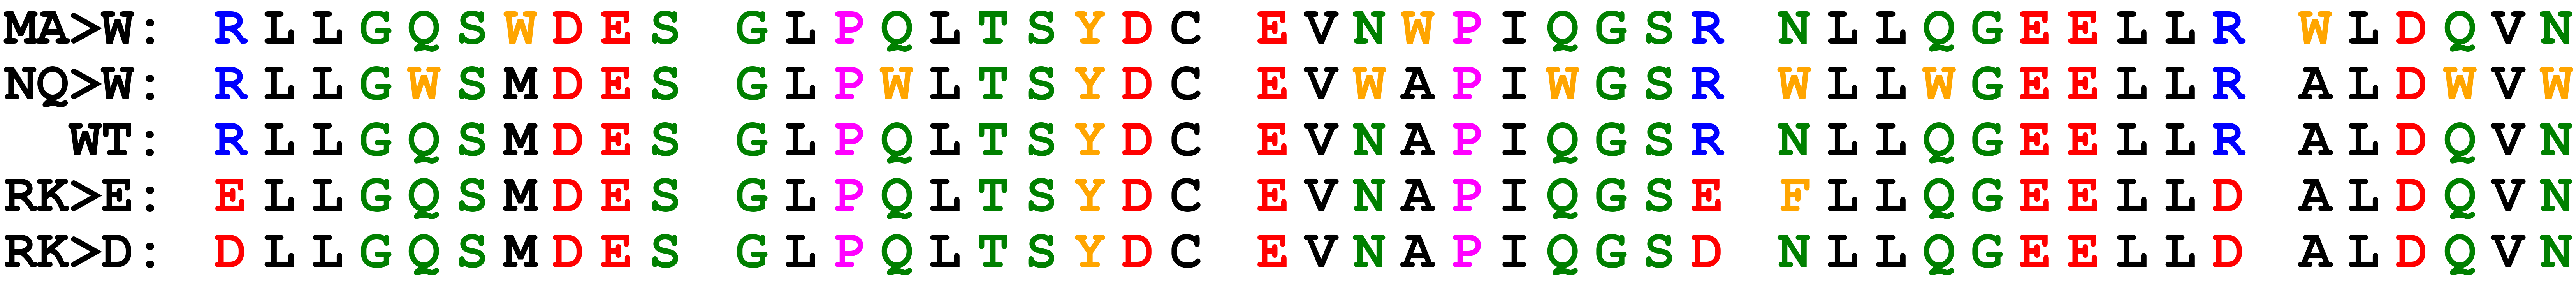

Figure generated: HIF1A_mutants.png


In [4]:
# Now we call the function into action
# Choose the file you want to work with
fasta_file = "HIF1A_fasta.txt"
sequences = read_fasta_file(fasta_file)  # Assuming you have the read_fasta_file function from the previous code

# Choose the name you want to save your figure as:
output_file = "HIF1A_mutants.png"

# call function
generate_figure(sequences, output_file)
print(f"Figure generated: {output_file}")

In [5]:
# This follwoign code is for defining 
def color_sequence(sequence):
    colored_sequence = ""
    for amino_acid in sequence:
        if amino_acid in ['D', 'E']:
            colored_sequence += f"\033[31m{amino_acid}\033[0m"  # Red
        elif amino_acid in ['R', 'K']:
            colored_sequence += f"\033[34m{amino_acid}\033[0m"  # Blue
        elif amino_acid in ['G', 'S', 'T', 'H', 'N', 'Q']:
            colored_sequence += f"\033[32m{amino_acid}\033[0m"  # Green
        elif amino_acid in ['A', 'I', 'L', 'V', 'M']:
            colored_sequence += amino_acid  # Black
        elif amino_acid in ['Y', 'F', 'W']:
            colored_sequence += f"\033[33m{amino_acid}\033[0m"  # Orange
        elif amino_acid == 'C':
            colored_sequence += f"\033[93m{amino_acid}\033[0m"  # Yellow
        elif amino_acid == 'P':
            colored_sequence += f"\033[35m{amino_acid}\033[0m"  # Purple
        else:
            colored_sequence += amino_acid  # Gray
    return colored_sequence

def read_fasta_file(file_path):
    sequences = {}
    current_sequence = ""
    current_name = ""
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith('>'):
                if current_name != "":
                    sequences[current_name] = current_sequence
                current_sequence = ""
                current_name = line[1:]
            else:
                current_sequence += line
        if current_name != "":
            sequences[current_name] = current_sequence
    return sequences

def print_colored_sequences(sequences):
    counter = 1
    for name, sequence in sequences.items():
        colored_sequence = color_sequence(sequence)
        print(f"{name}: {colored_sequence}")
        counter += 1

print_colored_sequences(sequences)


MA>W: RLLGQSWDESGLPQLTSYDCEVNWPIQGSRNLLQGEELLRWLDQVN
NQ>W: RLLGWSMDESGLPWLTSYDCEVWAPIWGSRWLLWGEELLRALDWVW
WT: RLLGQSMDESGLPQLTSYDCEVNAPIQGSRNLLQGEELLRALDQVN
RK>E: ELLGQSMDESGLPQLTSYDCEVNAPIQGSEFLLQGEELLDALDQVN
RK>D: DLLGQSMDESGLPQLTSYDCEVNAPIQGSDNLLQGEELLDALDQVN
